In [21]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import uniform
from freeze_metrics import BoutAnalyser, MarkovFreezing
from plotnine import *

In [22]:
dataset = r"C:\Users\Rory\Google Drive\ah_vids\PL-BLA\freeze_analysis\conditioning_reports\PLBLA_tidy.csv"
fig_dir = r"C:\Users\Rory\Google Drive\ah_vids\PL-BLA\freeze_analysis\figures\freezedynamics"

In [23]:
fig_dir = Path(fig_dir)
fig_dir.mkdir(exist_ok=True)
df = pd.read_csv(dataset)

In [24]:
vids = df.video_name.unique()
current_vid = vids[0]

df1 = df.loc[lambda x: x.video_name== current_vid]
obs_freezes = df1.was_freezing_obs.values

In [47]:
def get_metrics(arr, sampling_rate=1):
    bout_res = BoutAnalyser().fit(arr, sampling_rate=sampling_rate).get_results()
    markov_res = MarkovFreezing().fit(arr).get_results()
    return pd.concat([bout_res, markov_res])

In [48]:
get_metrics(obs_freezes)

mean_freeze_bout_length       13.440252
mean_active_bout_length       81.050314
time_freezing               4274.000000
time_active                25774.000000
transition_count             635.000000
freeze_bout_count            318.000000
active_bout_count            318.000000
p(f)                           0.142239
p(a)                           0.857761
p(f|f)                         0.925831
p(a|f)                         0.074169
p(a|a)                         0.987662
p(f|a)                         0.012338
dtype: float64

In [49]:
df_res = (
    df
    .groupby(["animal_name", "group"])
    .apply(lambda x: get_metrics(x.was_freezing_obs.values, x.fps.values[0]))
    .reset_index()
)

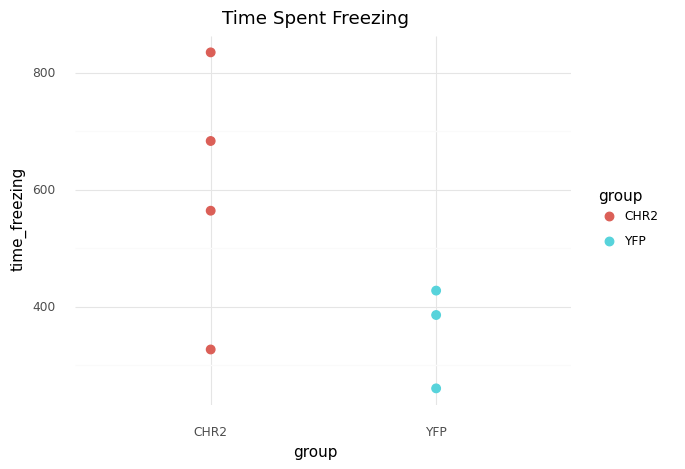

<ggplot: (80980209542)>

In [52]:
(
    ggplot(df_res, aes(x="group", y="time_freezing", color="group")) +
    geom_point(size=3) +
    theme_minimal() +
    ggtitle("Time Spent Freezing")
)

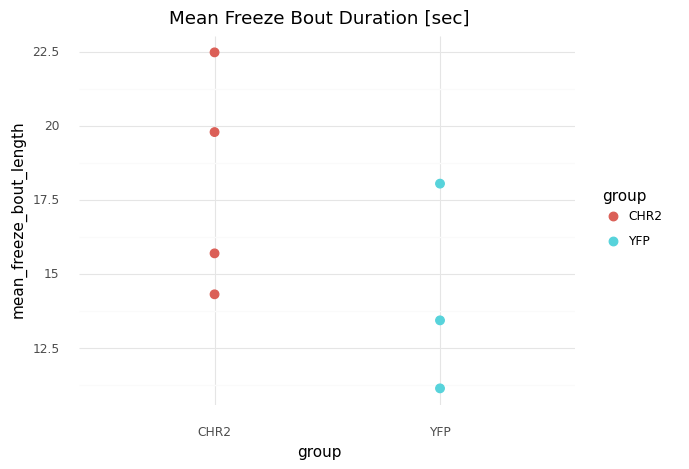

<ggplot: (80972032520)>

In [62]:
(
    ggplot(df_res, aes(x="group", y="mean_freeze_bout_length", color="group")) +
    geom_point(size=3) +
    theme_minimal() +
    ggtitle("Mean Freeze Bout Duration [sec]")
)

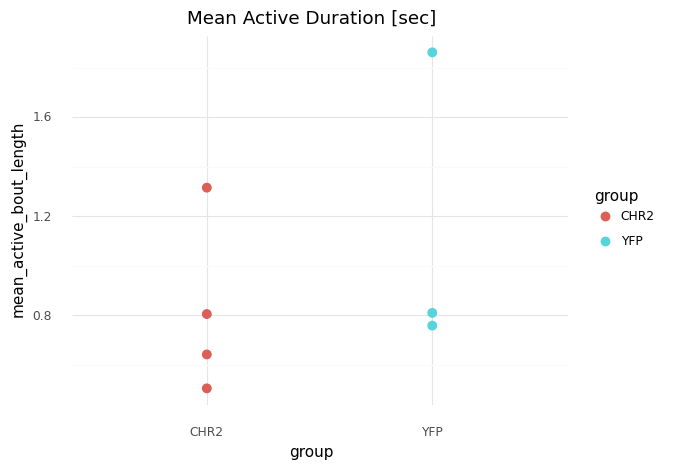

<ggplot: (-9223371955883899932)>

In [58]:
(
    ggplot(df_res, aes(x="group", y="mean_active_bout_length", color="group")) +
    geom_point(size=3) +
    theme_minimal() +
    ggtitle("Mean Active Duration [sec]")
)

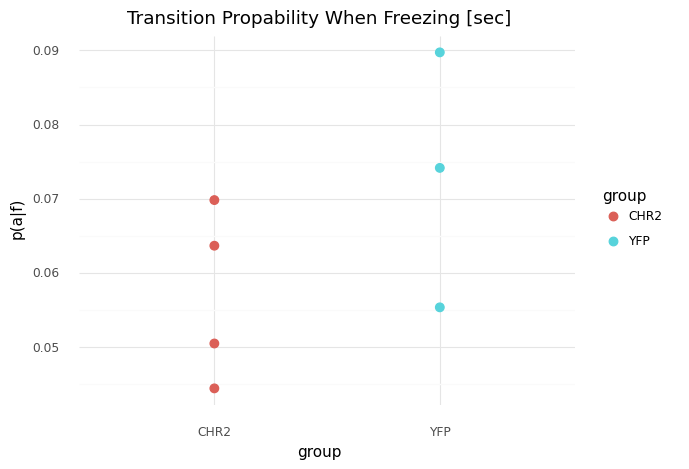

<ggplot: (80969780018)>

In [60]:
(
    ggplot(df_res, aes(x="group", y="p(a|f)", color="group")) +
    geom_point(size=3) +
    theme_minimal() +
    ggtitle("Transition Propability When Freezing")
)

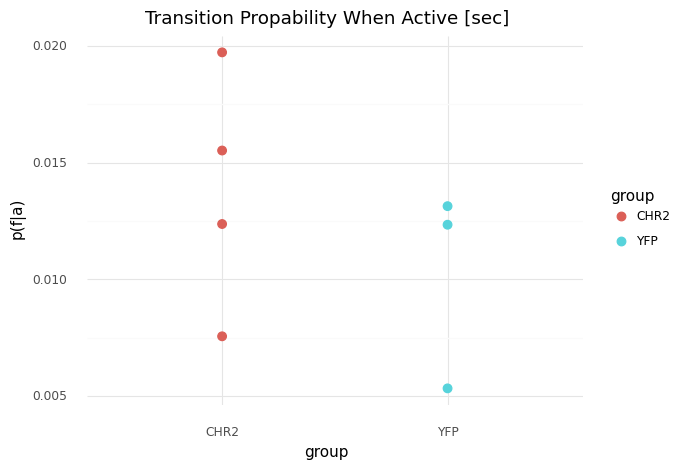

<ggplot: (-9223371955882785241)>

In [61]:
(
    ggplot(df_res, aes(x="group", y="p(f|a)", color="group")) +
    geom_point(size=3) +
    theme_minimal() +
    ggtitle("Transition Propability When Active [sec]")
)